# Importing libraries

In [97]:
import numpy as np
import pandas as pd

In [98]:
# For enabling the GPU support 
# %env CUDA_DEVICE_ORDER = PCI_BUS_ID
# %env CUDA_VISIBLE_DEVICES = 0,1

In [99]:
alphabet = list("ACDEFGHIKLMNPQRSTVWXY")

In [100]:
len(alphabet)

21

# Training dataset

In [101]:
train_data = pd.read_csv("Training_dataset.csv")

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38910 entries, 0 to 38909
Data columns (total 2 columns):
Label       38910 non-null int64
Sequence    38910 non-null object
dtypes: int64(1), object(1)
memory usage: 608.0+ KB


In [103]:
train_data.head()

,Label,Sequence
0,1,AAADPQALKALGMPLKR
1,1,AAAFPIARRIGHPYQNR
2,1,AAAGSLRQLDPRITAKR
3,1,AAAKFERQHMDSSTSAA
4,1,AAAKSRNRRRELTDTLQ


In [104]:
train_data['Label'].value_counts()

1    19455
0    19455
Name: Label, dtype: int64

# Creating Simple Amino Acid Composition

In [105]:
X_train = []

for label, sequence in train_data.values:
    frequency = {}
    for letter in alphabet:
        frequency[letter] = 0
    for letter in sequence:
        frequency[letter] = (frequency[letter] * len(sequence) + 1) / len(sequence)
    X_train.append(list(frequency.values()))

In [106]:
X_train_df_1 = pd.DataFrame(X_train, columns=alphabet)

In [107]:
X_train_df_1.head()

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
0,0.294118,0.0,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.117647,0.176471,...,0.000000,0.117647,0.058824,0.058824,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.235294,0.0,0.000000,0.000000,0.058824,0.058824,0.058824,0.117647,0.000000,0.000000,...,0.058824,0.117647,0.058824,0.176471,0.000000,0.000000,0.0,0.0,0.0,0.058824
2,0.235294,0.0,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.058824,0.117647,...,0.000000,0.058824,0.058824,0.176471,0.058824,0.058824,0.0,0.0,0.0,0.000000
3,0.294118,0.0,0.058824,0.058824,0.058824,0.000000,0.058824,0.000000,0.058824,0.000000,...,0.000000,0.000000,0.058824,0.058824,0.176471,0.058824,0.0,0.0,0.0,0.000000
4,0.176471,0.0,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.117647,...,0.058824,0.000000,0.058824,0.235294,0.058824,0.117647,0.0,0.0,0.0,0.000000


In [108]:
X_train_df = pd.concat([X_train_df_1, train_data[['Label']]], axis=1)

# Loading Bipeptide Amino Acid Composition

In [109]:
bipeptide = pd.read_csv('bipeptide_train.csv')

In [110]:
bipeptide.head()

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,12.50,0.0,6.25,0.0,0.00,0.00,0.0,0.0,0.00,12.5,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,12.50,0.0,0.00,0.0,6.25,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0
2,12.50,0.0,0.00,0.0,0.00,6.25,0.0,0.0,6.25,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,18.75,0.0,0.00,0.0,0.00,0.00,0.0,0.0,6.25,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,12.50,0.0,0.00,0.0,0.00,0.00,0.0,0.0,6.25,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
bipeptide.shape

(38910, 400)

# Loading Tripeptide Amino Acid Composition

In [112]:
tripeptide = pd.read_csv('tripeptide_train.csv')

In [113]:
tripeptide.shape

(38910, 9261)

In [114]:
X_train_df.shape

(38910, 22)

In [115]:
X_train_df = pd.concat([tripeptide, bipeptide, X_train_df], axis=1)

In [116]:
X_train_df.head()

,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,P,Q,R,S,T,V,W,X,Y,Label
0,6.666667,0.0,6.666667,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.117647,0.058824,0.058824,0.000000,0.000000,0.0,0.0,0.0,0.000000,1
1,6.666667,0.0,0.000000,0.0,6.666667,0.000000,0.0,0.0,0.000000,0.0,...,0.117647,0.058824,0.176471,0.000000,0.000000,0.0,0.0,0.0,0.058824,1
2,6.666667,0.0,0.000000,0.0,0.000000,6.666667,0.0,0.0,0.000000,0.0,...,0.058824,0.058824,0.176471,0.058824,0.058824,0.0,0.0,0.0,0.000000,1
3,6.666667,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,6.666667,0.0,...,0.000000,0.058824,0.058824,0.176471,0.058824,0.0,0.0,0.0,0.000000,1
4,6.666667,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,6.666667,0.0,...,0.000000,0.058824,0.235294,0.058824,0.117647,0.0,0.0,0.0,0.000000,1


# Creating Training and Testing Data

In [117]:
X_train = X_train_df.iloc[:, :-1].values
y_train = X_train_df.iloc[:, -1].values

In [118]:
for index, label in enumerate(y_train):
    if label == -1:
        y_train[index] = 0

In [119]:
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [120]:
print(X_train.shape)
print(y_train.shape)

(38910, 9682)
(38910,)


# Feature Selection using ExtraTreeClassifier

In [121]:
# Selecting top features using ExtraTreesClassifier.

from sklearn.ensemble import ExtraTreesClassifier

TOP_FEATURES = 2900

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 9675 (0.017748)
2. feature 6945 (0.014198)
3. feature 9673 (0.013779)
4. feature 5159 (0.013281)
5. feature 6942 (0.013089)
6. feature 6419 (0.013085)
7. feature 9560 (0.012483)
8. feature 9575 (0.012162)
9. feature 5556 (0.011449)
10. feature 5292 (0.009502)
11. feature 6019 (0.009304)
12. feature 5978 (0.009255)
13. feature 9676 (0.009181)
14. feature 6879 (0.008771)
15. feature 5544 (0.008443)
16. feature 9495 (0.008048)
17. feature 264 (0.007856)
18. feature 5304 (0.007696)
19. feature 9513 (0.007555)
20. feature 3469 (0.007505)
21. feature 3637 (0.007398)
22. feature 9453 (0.007052)
23. feature 9573 (0.007009)
24. feature 9669 (0.006700)
25. feature 9670 (0.006535)
26. feature 252 (0.006454)
27. feature 9595 (0.006410)
28. feature 9649 (0.006403)
29. feature 9517 (0.006307)
30. feature 9625 (0.006300)
31. feature 9369 (0.006191)
32. feature 1080 (0.006167)
33. feature 9516 (0.006099)
34. feature 9668 (0.005966)
35. feature 6476 (0.005923)
36. feature 5409 

1653. feature 3213 (0.000026)
1654. feature 6099 (0.000026)
1655. feature 9468 (0.000026)
1656. feature 1138 (0.000025)
1657. feature 2552 (0.000025)
1658. feature 1485 (0.000025)
1659. feature 9579 (0.000025)
1660. feature 8266 (0.000025)
1661. feature 7744 (0.000025)
1662. feature 2843 (0.000025)
1663. feature 6482 (0.000025)
1664. feature 5340 (0.000025)
1665. feature 202 (0.000025)
1666. feature 9327 (0.000025)
1667. feature 3459 (0.000025)
1668. feature 2401 (0.000025)
1669. feature 3768 (0.000025)
1670. feature 3251 (0.000025)
1671. feature 5927 (0.000025)
1672. feature 4116 (0.000025)
1673. feature 6693 (0.000025)
1674. feature 2444 (0.000025)
1675. feature 1193 (0.000025)
1676. feature 2487 (0.000025)
1677. feature 3140 (0.000025)
1678. feature 2213 (0.000025)
1679. feature 2636 (0.000024)
1680. feature 2891 (0.000024)
1681. feature 7595 (0.000024)
1682. feature 6534 (0.000024)
1683. feature 9014 (0.000024)
1684. feature 6958 (0.000024)
1685. feature 4880 (0.000024)
1686. featu

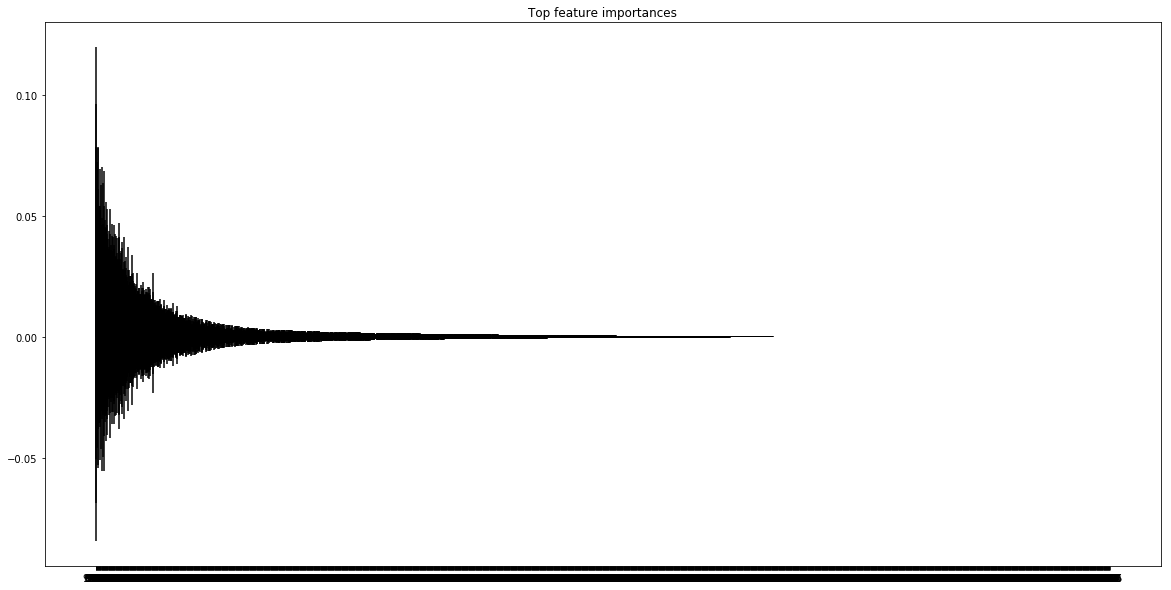

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the importance of features.
plt.figure(figsize = (20,10))
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()

In [123]:
# Selecting top features from all the features.
X1 = X_train_df.columns.drop(['Label'])
X1=X_train_df.columns.tolist()
X1 = [X1[i] for i in indices]

In [124]:
X_train = X_train_df[X1]

# Running the model

In [125]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [54]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8338730403495246

In [53]:
from sklearn.svm import SVC
## XGBoost classifier for training the model with best parameter for Grid Search 
clf = SVC(random_state=0)
# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7334104343356463

In [67]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(1024, input_dim=9682, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

Using TensorFlow backend.


In [44]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
38910/38910 [==============================] - 140s 4ms/step - loss: 0.4924 - accuracy: 0.7635
Epoch 2/20
38910/38910 [==============================] - 142s 4ms/step - loss: 0.2597 - accuracy: 0.9013
Epoch 3/20
38910/38910 [==============================] - 139s 4ms/step - loss: 0.1526 - accuracy: 0.9417
Epoch 4/20
38910/38910 [==============================] - 140s 4ms/step - loss: 0.1147 - accuracy: 0.9532
Epoch 5/20
38910/38910 [==============================] - 139s 4ms/step - loss: 0.0926 - accuracy: 0.9604
Epoch 6/20
38910/38910 [==============================] - 141s 4ms/step - loss: 0.0802 - accuracy: 0.9644
Epoch 7/20
38910/38910 [==============================] - 139s 4ms/step - loss: 0.0717 - accuracy: 0.9686
Epoch 8/20
38910/38910 [==============================] - 139s 4ms/step - loss: 0.0657 - accuracy: 0.9698
Epoch 9/20
38910/38910 [==============================] - 139s 4ms/step - loss: 0.0616 - accuracy: 0.9719
Epoch 10/20
38910/38910 [=====================

# Cross Validation on Train Data

In [126]:
from sklearn.model_selection import cross_val_score
cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(random_state=0), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_rfc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  83.32 %


# Loading the Test Dataset

In [127]:
test_data = pd.read_csv("validation_dataset.csv")

In [128]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
ID          2000 non-null int64
Sequence    2000 non-null object
dtypes: int64(1), object(1)
memory usage: 31.3+ KB


In [129]:
test_data.head()

,ID,Sequence
0,10000,SSRAGLQFPVGRVHRLL
1,10001,KKPYFPEAELYHFAEKA
2,10002,AARNDQATGTCPFLTAA
3,10003,SKLFLAGFLEGEASLNI
4,10004,XXMALTKAEMSEYLFDK


In [130]:
X_test = []

for _id, sequence in test_data.values:
    frequency = {}
    for letter in alphabet:
        frequency[letter] = 0
    for letter in sequence:
        frequency[letter] = (frequency[letter] * len(sequence) + 1) / len(sequence)
    X_test.append(list(frequency.values()))

In [131]:
X_test_df_1 = pd.DataFrame(X_test, columns=alphabet)

In [132]:
X_test_df_1.head()

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
0,0.058824,0.000000,0.000000,0.000000,0.058824,0.117647,0.058824,0.000000,0.000000,0.176471,...,0.000000,0.058824,0.058824,0.176471,0.117647,0.000000,0.117647,0.0,0.000000,0.000000
1,0.176471,0.000000,0.000000,0.176471,0.117647,0.000000,0.058824,0.000000,0.176471,0.058824,...,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.117647
2,0.294118,0.058824,0.058824,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.000000,0.176471,0.000000,0.0,0.000000,0.000000
3,0.117647,0.000000,0.000000,0.117647,0.117647,0.117647,0.000000,0.058824,0.058824,0.235294,...,0.058824,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.0,0.000000,0.000000
4,0.117647,0.000000,0.058824,0.117647,0.058824,0.000000,0.000000,0.000000,0.117647,0.117647,...,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.0,0.117647,0.058824


In [133]:
bipeptide_test = pd.read_csv('bipeptide_test.csv')

In [134]:
bipeptide_test.head()

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.0,0.00,0.0,6.25,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.50,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.5,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00,0.0,6.25,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,7.14,0.0,0.00,0.0,0.0,0.0,7.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
tripeptide_test = pd.read_csv('tripeptide_test.csv')

In [136]:
X_test_df = pd.concat([tripeptide_test, bipeptide_test, X_test_df_1], axis=1)

In [137]:
X_test_df = X_test_df[X1]

In [138]:
X_test_df.shape

(2000, 2900)

# Predicting the output

In [139]:
predict = clf.predict(X_test_df)
predict.shape

(2000,)

In [ ]:
y_pred = model.predict(X_test_df)
y_pred.shape

In [60]:
predict = list()
for i in range(len(y_pred)):
    predict.append(np.argmax(y_pred[i]))

In [61]:
len(predict)

2000

In [62]:
predict

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [140]:
valid = pd.read_csv('validation_dataset.csv')
lab = valid.ID

In [141]:
predict = pd.DataFrame(predict)

In [142]:
#Creating the output dataframe
output = pd.concat([lab,predict],axis=1)
output.head()

,ID,0
0,10000,0
1,10001,0
2,10002,0
3,10003,1
4,10004,1


In [143]:
# creating the output csv file
output.to_csv('output19.csv', header=['ID','Label'], index=False)

In [45]:
for index, label in enumerate(pred):
    if label == 0:
        pred[index] = -1

In [46]:
pred

[-1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -

In [45]:
sample = pd.concat([test_data,pd.DataFrame(pred, columns = ['Label'])], axis = 1)

In [46]:
sample.head()

,ID,Sequence,Label
0,1001,AAFYKTFKTV,-1
1,1002,AAGANPLGLK,1
2,1003,AAMCMVVT,-1
3,1004,AASVSEEFRADH,-1
4,1005,ACCNGIRNVN,-1
